<a href="https://colab.research.google.com/github/florgaleana/SSF-Oto24FlorMarianGaleanaJuarez/blob/main/SSFT5FlorGaleana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flor Marián Galeana Juárez

*Simulación de Sistemas Físicos*

**Tarea 5.**



1.   Implementar y ejecutar el código de Example 4.1.3, y generar la gráfica 4.1 (del Ayars).

Para esto, al no contar con la carpeta tools.py, utilizamos scipy.integrate, donde importamos solve_ivp para el método de Euler.



In [ ]:
from pylab import *
import numpy as np
from scipy.integrate import solve_ivp
 #Método de Euler para EDOs

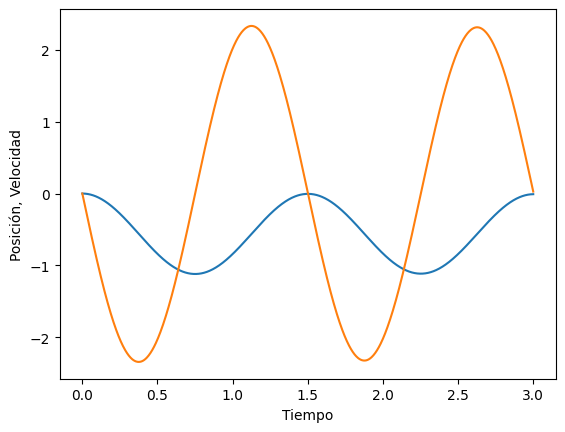

In [ ]:
N=1000 #Número de particiones a tomar
x_o=0.0 #Posición inicial
v_o=0.0 #Velocidad inicial
tau=3.0 #tiempo total de la simulación en segundos

dt=tau/float(N-1) #Paso del tiempo
k=3.5 #Constante del resorte en N/m
m=0.2 #Masa
g=9.8 #Gravedad

#Como estamos graficando contra el tiempo, necesitamos
#el tiempo para la gráfica:
t=np.linspace(0,tau,N)
#Crea una matriz Nx2 para almacenar los resultados de los cálculos
#Cada fila se utilizará para el estado del sistema en un instante.
#Cada instante está separado por dt.

#El primer elemento de cada fila será la posición y el segundo velocidad.
#y=zeros([N,2])

#y[0,0]=x_o #Estado inicial
#y[0,1]=v_o

def SHO(t,state):
  #Estamos definiendo la ec dif dx^2/dt= -k/m x-g
  x, v= state
  dxdt = v
  dvdt = -k/m * x - g
  return [dxdt, dvdt]

  #Ahora hacemos los cálculos usando loop sólo en N-1
  #para no anexar a y[N+1] en el punto final.
sol = solve_ivp(SHO, [0, tau], [x_o, v_o], t_eval=t, method='RK23')  # Usa RK23 que se acerca a Euler

# Extraemos los resultados
xdata = sol.y[0]  # Posición
vdata = sol.y[1]  # Velocidad
  #for j in range (N-1):
    #y[j], el tiempo, dt el paso del tiempo
    #y la función derivada SHO()
    #y[j+1] = euler(y[j], t[j], dt, SHO)

#Ahora graficamos:
xdata=sol.y[0]
vdata =sol.y[1]

plot(t, xdata)
plot(t, vdata)
xlabel("Tiempo")
ylabel("Posición, Velocidad")
show()

Simplemente por experimentación, modificamos los parámetros del código anterior, como el número de particiones (N) y el tiempo de total de la simulación ($\tau$).

Donde observamos que si aumentamos N hay un número mayor de puntos en los que se calcula la solución de la EDO. Esto también reduce el tamaño del paso de tiempo, ya que $dt= \frac{τ}{N-1}$. Esto genera una precisión mayor, ya que la aproximación y la velocidad son más precisas. Gráficamente, la función se ve más suave y detallada.

Si $τ$ es muy grande, la gráfica cubre un mayor intervalo de tiempo y se ven más oscilaciones.

Por el contrario, al disminuir N, observamos una gráfica menos suave y detallada, la solución de la EDO es menos precisa y observamos bastantes picos.

Y si $τ$ es muy pequeña, notamos que las soluciones se ven como lineas rectas o bien parábolas, esto implica que al tener menor intervalo de tiempo, se ven menores oscilaciones.



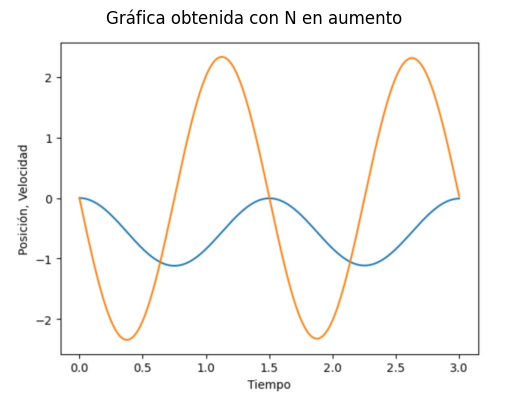

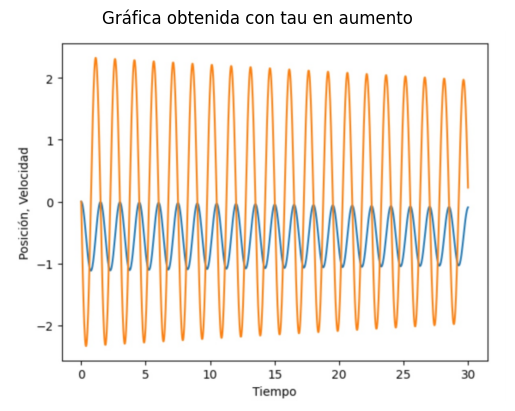

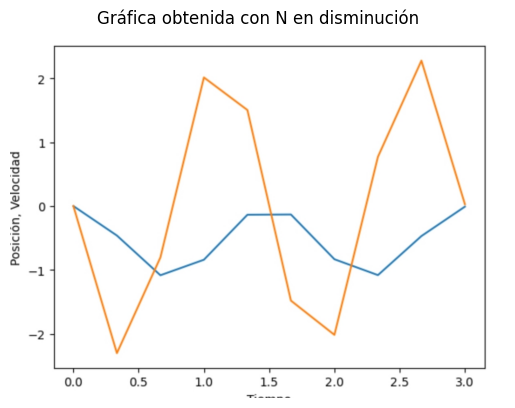

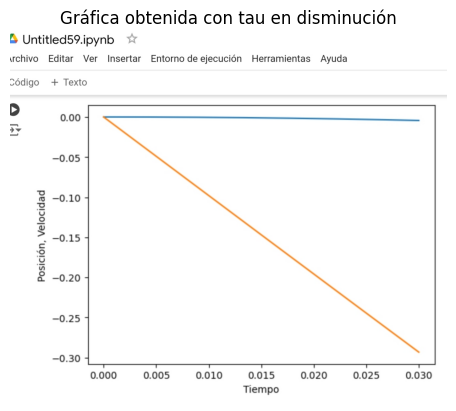

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar la imagen desde una ruta local
img = mpimg.imread('/content/1.jpg')

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.title('Gráfica obtenida con N en aumento')
plt.show()

img2 = mpimg.imread('/content/2.jpg')
plt.imshow(img2)
plt.axis('off')
plt.title('Gráfica obtenida con tau en aumento')
plt.show()

img3 = mpimg.imread('/content/3.jpg')
plt.imshow(img3)
plt.axis('off')
plt.title('Gráfica obtenida con N en disminución')
plt.show()

img4 = mpimg.imread('/content/4.jpg')
plt.imshow(img4)
plt.axis('off')
plt.title('Gráfica obtenida con tau en disminución')
plt.show()


2.   Implementar y ejecutar el código del Example 4.4.1 (Ayars), modificar k (3 valores cercanos a 0, 3 del orden de 1-10, 3 mayores a 50) y comparar los resultados.



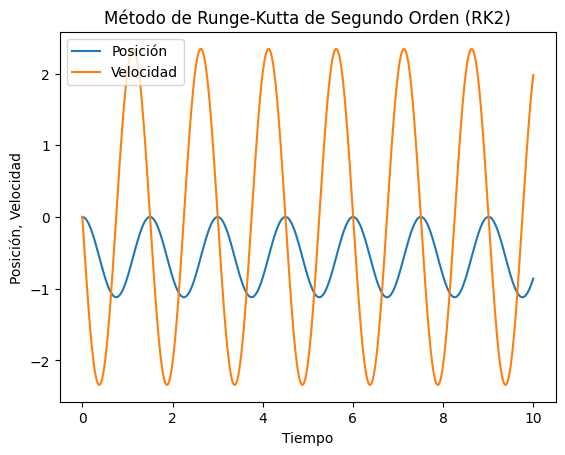

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Retomando las constantes del problema
k = 3.5
m = 0.2
g = 9.8
tau = 10.0  # Tiempo total de la simulación
N = 1000  # Número de particiones
x_o = 0.0
v_o = 0.0
# Matriz para almacenar los resultados [posición, velocidad]
y = np.zeros((N, 2))
y[0, 0] = x_o  # Posición inicial
y[0, 1] = v_o  # Velocidad inicial

# Método de Runge-Kutta de segundo orden (RK2)
def rk2(y, t, dt, derivs):
    k0 = dt * derivs(y, t)
    k1 = dt * derivs(y + k0, t + dt)
    y_n = y + 0.5 * (k0 + k1)
    return y_n

# Implementamos el método de RK2 para resolver el sistema
for j in range(N-1):
    y[j+1] = rk2(y[j], t[j], dt, derivs)

# Extraemos los datos de posición y velocidad
xdat = y[:, 0]  # Posición
vdat = y[:, 1]  # Velocidad

# Graficamos los resultados
plt.plot(t, xdat, label='Posición')
plt.plot(t, vdat, label='Velocidad')
plt.xlabel("Tiempo")
plt.ylabel("Posición, Velocidad")
plt.legend()
plt.title("Método de Runge-Kutta de Segundo Orden (RK2)")
plt.show()


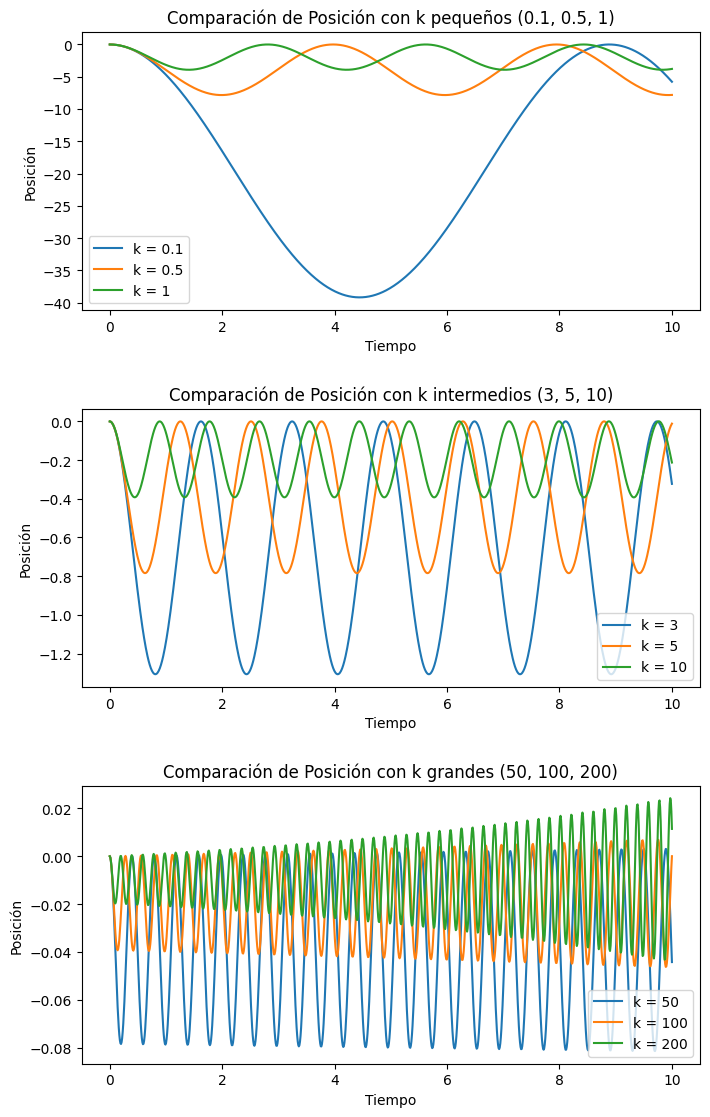

In [ ]:
# Agregando los valores de k para comparar
k_values = {
    "k pequeños (0.1, 0.5, 1)": [0.1, 0.5, 1],
    "k intermedios (3, 5, 10)": [3, 5, 10],
    "k grandes (50, 100, 200)": [50, 100, 200]
}

#  Retomamos la función que describe la derivada del sistema (oscilador armónico)
def derivs(state, t, k):
    x, v = state
    dxdt = v
    dvdt = -k/m * x - g
    return np.array([dxdt, dvdt])

# Método de Runge-Kutta de segundo orden (RK2)
def rk2(y, t, dt, k):
    k0 = dt * derivs(y, t, k)
    k1 = dt * derivs(y + k0, t + dt, k)
    y_n = y + 0.5 * (k0 + k1)
    return y_n

# Creamos subplots para los tres casos (los tres valores de k)
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
fig.tight_layout(pad=5.0)

# Recorremos los grupos de valores de k y graficar
for idx, (label, k_list) in enumerate(k_values.items()):
    for k in k_list:
        # Matriz para almacenar los resultados [posición, velocidad]
        y = np.zeros((N, 2))
        y[0, 0] = x_o  # Posición inicial
        y[0, 1] = v_o  # Velocidad inicial

        # Implementamos el método de RK2 nuevamente para resolver el sistema
        for j in range(N-1):
            y[j+1] = rk2(y[j], t[j], dt, k)

        # Extraer datos de posición
        xdata = y[:, 0]  # Posición

        # Graficar para el valor actual de k
        axs[idx].plot(t, xdata, label=f'k = {k}')

    # Configuración del gráfico
    axs[idx].set_title(f"Comparación de Posición con {label}")
    axs[idx].set_xlabel("Tiempo")
    axs[idx].set_ylabel("Posición")
    axs[idx].legend()

# Mostramos las gráficas
plt.show()

Estas gráficas muestran y comparan la posición a lo largo del tiempo para tres valores de k en tres rangos o valores diferentes: pequeños, intermedios y grandes.

Antes de concluir, recordemos qué es k, k es la constante del resorte, ¿pero cómo afecta esta en nuestra solución de nuestro sistema? Podemos ver en cada gráfica el cambio del comportamiento del resorte a medida que este se vuelve más débil o más fuerte. Analizando los gráficos, cuando k es muy pequeño o "débil", implica menores oscilaciones, oscilaciones suaves y casi inexistentes; físicamente, el movimiento del resorte podría estar más influenciado por la fuerza de gravedad que por su fuerza restauradora, esto es mayormente apreciable para k=0.1.

Cuando k presenta valores intermedios, vemos una gráfica con oscilaciones regulares, mayormente típicas de un oscilador armónico. Donde es mayormente visible que la amplitud y frecuencia de las oscilaciones dependen del valor de k.

En cambio, para valores de k muy grandes, o para un resorte "fuerte" vemos que la gráfica presenta bastantes oscilaciones y de alta frecuencia, esto es lo opuesto a cuando el resorte es débil, el movimiento se encuentra influenciado por la fuerza restauradora más que por el de la gravedad.

3. Implementar y ejecutar el código de Example 4.5.2 (Ayars),modificar k como el punto 2.

En el siguiente código, la función define el sistema de ecuaciones diferenciales para el péndulo. El ángulo $θ$ y la velocidad angular $ω$ evolucionan en el tiempo según las ecuaciones dadas. La derivada de $θ$ es simplemente la velocidad angular $ω$, mientras que la derivada de $ω$ incluye la gravedad, el amortiguamiento, y la fuerza externa oscilante.


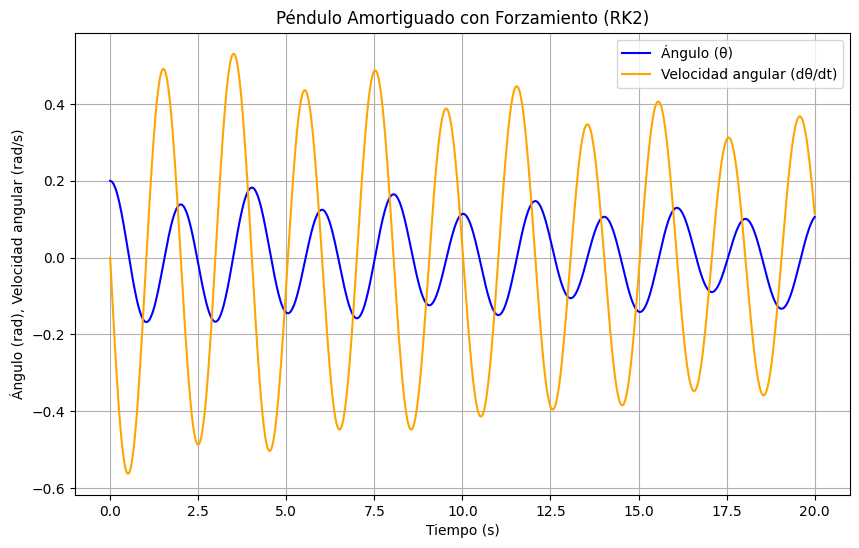

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Este código presenta la simulación de un péndulo amortiguado con forzamiento
# Parámetros del sistema
g = 9.81
l = 1.0   # Longitud del péndulo (m)
b = 0.05  # Coeficiente de amortiguamiento
beta = 0.2  # Amplitud de la fuerza externa
w = 1.5   # Frecuencia de la fuerza externa (rad/s)
tau = 20
N = 1000
theta_0 = 0.2  # Ángulo inicial (rad)
omega_0 = 0.0  # Velocidad angular inicial (rad/s)

# Definimos el paso de tiempo
dt = tau / float(N-1)
#Creamos el vector del tiempo
t = np.linspace(0, tau, N)

#Definimos la función que describe las derivadas del sistema
def pendulum_def(state, t):
    theta, omega = state
    dtheta_dt = omega
    domega_dt = -g/l * np.sin(theta) - b * omega + beta * np.cos(w * t)
    return np.array([dtheta_dt, domega_dt])

# Método de Runge-Kutta de segundo orden (RK2)
def rk2(y, t, dt, derivs):
    k0 = dt * derivs(y, t)
    k1 = dt * derivs(y + k0, t + dt)
    y_n = y + 0.5 * (k0 + k1)
    return y_n

# Inicializamos el array para almacenar los resultados [theta, omega]
y = np.zeros((N, 2))
y[0, 0] = theta_0
y[0, 1] = omega_0

# Implementamos el método de RK2 para resolver el sistema
for j in range(N-1):
    y[j+1] = rk2(y[j], t[j], dt, pendulum_def)

# Extraemos los datos de ángulo y velocidad angular
theta_data = y[:, 0]  # Ángulo (theta)
omega_data = y[:, 1]  # Velocidad angular (omega)

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(t, theta_data, label='Ángulo (θ)', color='blue')
plt.plot(t, omega_data, label='Velocidad angular (dθ/dt)', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad), Velocidad angular (rad/s)')
plt.title('Péndulo Amortiguado con Forzamiento (RK2)')
plt.legend()
plt.grid(True)
plt.show()


Graficamos dos curvas: una para el ángulo θ (en azul) y otra para la velocidad angular ω (en naranja), ambas en función del tiempo.

Ahora, modificaremos k, como en el código anterior, en este caso, k es $\frac{g}{l}$, ya que representa el impacto de la gravedad sobre el péndulo. Para este código, podemos modificar 3 rangos o valores de k dependiendo del sistema: para k pequeño es un sistema con gravedad baja y una cuerda muy larga; para k intermedio, representa un sistema en condiciones "normales", gravedad y longitud normales; y para k grande, representa un sistema con alta gravedad o una cuerda muy corta.

En el siguiente código se comparará la posición angular $θ$ para cada uno de estos valores.

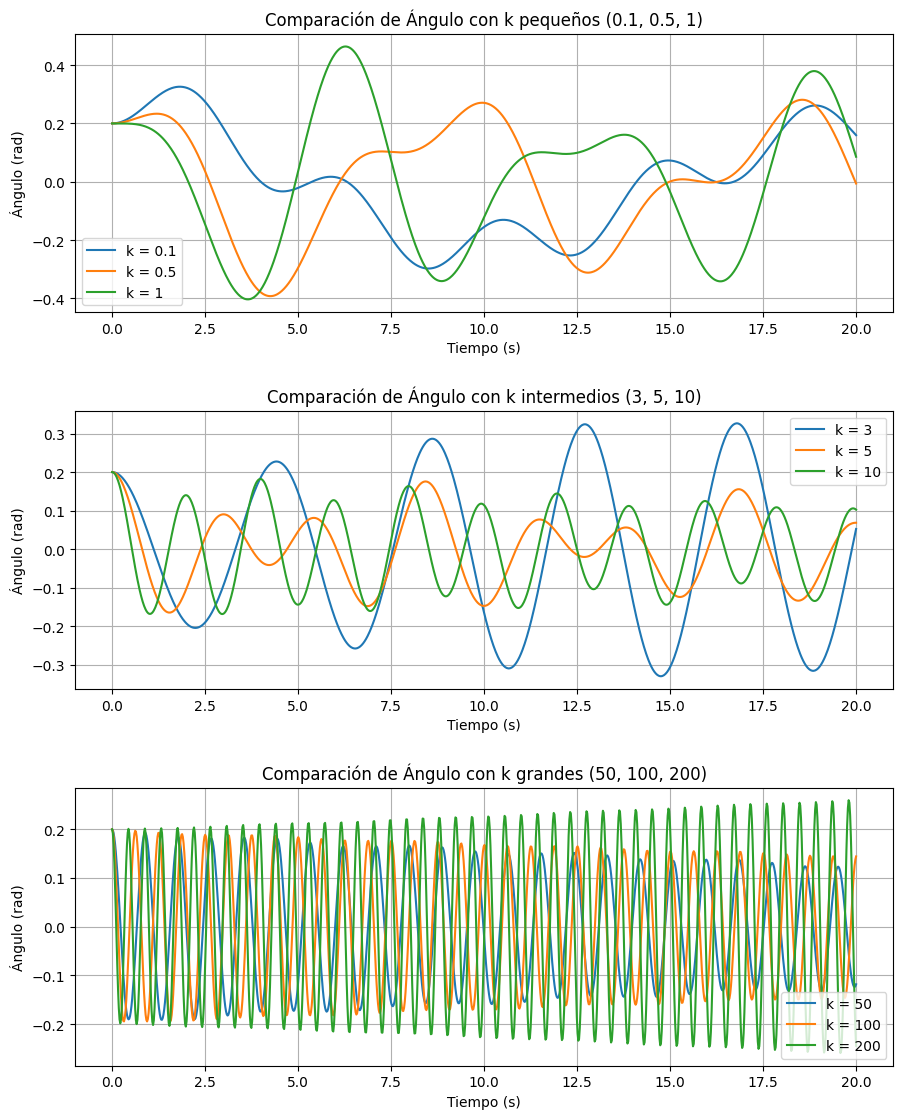

In [ ]:
# Definimos alores de k (g/l) para comparar
k_values = {
    "k pequeños (0.1, 0.5, 1)": [0.1, 0.5, 1],
    "k intermedios (3, 5, 10)": [3, 5, 10],
    "k grandes (50, 100, 200)": [50, 100, 200]
}

#Redefinimos la función que describe las derivadas del sistema
def pendulum_def(state, t, k):
    theta, omega = state
    dtheta_dt = omega
    domega_dt = -k * np.sin(theta) - b * omega + beta * np.cos(w * t)
    return np.array([dtheta_dt, domega_dt])

# Método de Runge-Kutta de segundo orden (RK2)
def rk2(y, t, dt, k):
    k0 = dt * pendulum_def(y, t, k)
    k1 = dt * pendulum_def(y + k0, t + dt, k)
    y_n = y + 0.5 * (k0 + k1)
    return y_n

# Crear subplots para los tres casos
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
fig.tight_layout(pad=5.0)

# Recorremos los grupos de valores de k y graficar
for idx, (label, k_list) in enumerate(k_values.items()):
    for k in k_list:
        # Matriz para almacenar los resultados [theta, omega]
        y = np.zeros((N, 2))
        y[0, 0] = theta_0
        y[0, 1] = omega_0

        # Implementamos el método de RK2 para resolver el sistema
        for j in range(N-1):
            y[j+1] = rk2(y[j], t[j], dt, k)

        # Extraemos datos de ángulo (theta)
        theta_data = y[:, 0]  # Ángulo (theta)

        # Graficamos para el valor actual de k
        axs[idx].plot(t, theta_data, label=f'k = {k}')

    # Configuracion del gráfico
    axs[idx].set_title(f"Comparación de Ángulo con {label}")
    axs[idx].set_xlabel("Tiempo (s)")
    axs[idx].set_ylabel("Ángulo (rad)")
    axs[idx].legend()
    axs[idx].grid(True)

# Mostrar las gráficas
plt.show()


Para valores pequeños de k notamos:
Como explicamos al inicio del código, un valor pequeño de k implica un sistema con poca gravedad o una cuerda muy larga, lo que disminuye la aceleración angular. Por lo que implica que el pénduilo oscila lentamente.

Para valores intermedios:
Notamos un comportamiento más típico de un péndulo amortiguado con forzamiento, donde observamos oscilaciones amortiguadas con cierta influencia de la fuerza externa.

Parw valores muy grandes de k:
Ya sea por una gravedad muy alta o una cuerda muy corta, esto resulta en oscilaciones rápidas y con un mayor control por parte de la gravedad, superando el efecto de la fuerza externa.